In [1]:
import sys
sys.path.append("../")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from neural_net.nn_utils import *
from models.model_generators import *
from sampling.least_squares_sampler import LeastSquaresSampler
from sampling.rate_schedulers import *

In [3]:
print("INFO: Training Network")
net = get_trained_network('../configs/nn_config.ini')
print("INFO: Generating Linear Model")
model, ld_model = generate_nn_linear_models('../configs/nn_config.ini', net)

INFO: Training Network
Epoch 0, Loss: 1.0051, Validation Loss: 4007.4031
Epoch 100, Loss: 0.8987, Validation Loss: 3584.0574
Epoch 200, Loss: 0.8018, Validation Loss: 3214.8691
Epoch 300, Loss: 0.7379, Validation Loss: 2893.2341
Epoch 400, Loss: 0.6647, Validation Loss: 2612.0562
Epoch 500, Loss: 0.6094, Validation Loss: 2372.3538
Epoch 600, Loss: 0.5623, Validation Loss: 2177.1294
Epoch 700, Loss: 0.5262, Validation Loss: 2025.8491
Epoch 800, Loss: 0.4991, Validation Loss: 1914.1669
Epoch 900, Loss: 0.4802, Validation Loss: 1831.9042
Epoch 1000, Loss: 0.4713, Validation Loss: 1770.4888
Epoch 1100, Loss: 0.4578, Validation Loss: 1721.9670
Epoch 1200, Loss: 0.4490, Validation Loss: 1681.5941
Epoch 1300, Loss: 0.4552, Validation Loss: 1646.5771
Epoch 1400, Loss: 0.4337, Validation Loss: 1614.9136
Epoch 1500, Loss: 0.4357, Validation Loss: 1585.5393
Epoch 1600, Loss: 0.4178, Validation Loss: 1558.7172
Epoch 1700, Loss: 0.4182, Validation Loss: 1533.5057
Epoch 1800, Loss: 0.4064, Validatio

In [4]:
d_dash = 501

In [5]:
# set up ls sampling method
ls_sampler = LeastSquaresSampler(model, 6000, np.zeros(d_dash))

In [6]:
N = 1
n_iters = 4000
samples = np.zeros((N, d_dash))
trueSamples = np.zeros((N, d_dash))
diffs = np.zeros((N, n_iters))
errors = np.zeros((N, n_iters))
z_values = np.zeros((N, n_iters, d_dash))
for i in range(N):
    samples[i], (debug) = ls_sampler.sample(
        rate=1e-5, 
        threshold=0, 
        max_iters=n_iters, 
        debug=True, 
        debug_steps=1000,  
        momentum='nesterov', 
        beta=0.99,
        scheduler=cosine_annealing
    )
    diffs[i,:], errors[i,:], trueSamples[i], z_values[i,:,:] = debug[0], debug[1], debug[2], debug[4]

Starting LS sampling, momentum=nesterov, beta=0.99, rate=1e-05, max_iters=4000, scheduler=<function cosine_annealing at 0x7f6feb9dae50>
Computing Epsilon...
Computing true sample
Computing regulariser...


  0%|          | 0/4000 [00:00<?, ?it/s]


KeyError: 'scheduler_n_epochs'

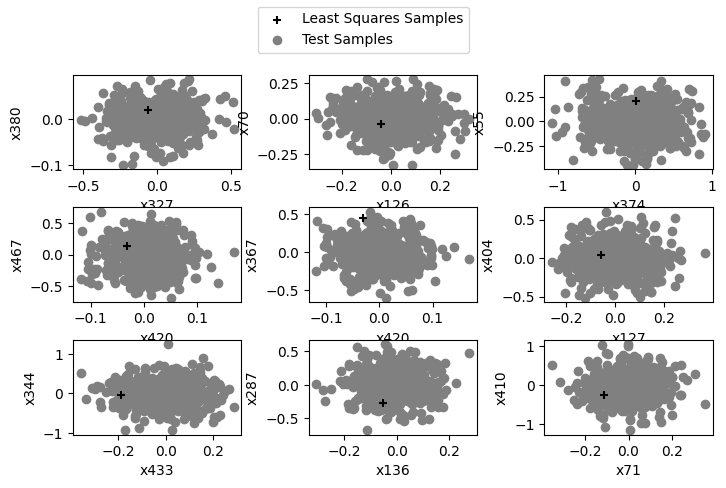

In [20]:
test_samples = np.random.multivariate_normal(np.zeros(d_dash), ld_model.Hinv, size=500)
fig, ax = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        a = 1
        b = 1
        while a == b:    
            a = np.random.randint(0, d_dash)
            b = np.random.randint(0, d_dash)
            if a != b: 
                ax[i][j].scatter(samples[:,a], samples[:,b], color='Black', marker='+', label="Least Squares Samples")
                ax[i][j].scatter(test_samples[:,a], test_samples[:,b], c='Grey', zorder=-1, label="Test Samples")
                #ax[i][j].scatter(trueSamples[:,a], trueSamples[:,b], c='Orange', zorder=-1, label="Target Samples")
                #ax[i][j].scatter(z_values[0,:,a], z_values[0,:,b], c='Red', zorder=-1, label="Target Samples", marker='+')
                ax[i][j].set_xlabel("x{}".format(a))
                ax[i][j].set_ylabel("x{}".format(b))
handles, labels = ax[1][2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.1,
                    top=0.85,
                    wspace=0.4,
                    hspace=0.4)